In [15]:
import sys
sys.path.insert(0,'/home/ekoehn/software/')
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import importlib

import hysteresis
from hysteresis import hyst_areas as ha
importlib.reload(ha)

<module 'hysteresis.hyst_areas' from '/home/ekoehn/software/hysteresis/hyst_areas.py'>

In [16]:
length = 180
ref_axis = np.sin(np.linspace(-np.pi/2,3/2*np.pi,length)) # strictly monotonically increasing and then strictly monotonically decreasing reference axis over a 2pi cycle
data_series = np.cos(np.linspace(-np.pi/2,3/2*np.pi,length))+0.05*np.cos(20*np.linspace(-np.pi/2,3/2*np.pi,length)) # 
#data_series[int(length/2):]=1

Text(0.5, 1.0, 'Data series vs. ref. axis')

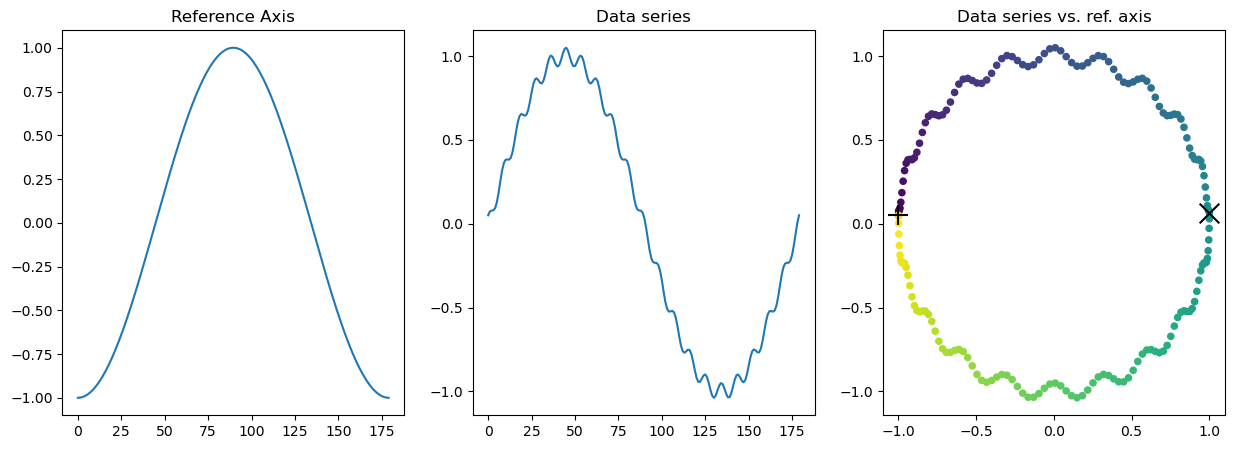

In [17]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(ref_axis)
ax[0].set_title('Reference Axis')
ax[1].plot(data_series)
ax[1].set_title('Data series')
ax[2].scatter(ref_axis,data_series,20,np.arange(length))
#find argmax of ref_axis
argmini = np.argmin(ref_axis)
argmaxi = np.argmax(ref_axis)
ax[2].scatter(ref_axis[argmini],data_series[argmini],200,'k',marker='+')
ax[2].scatter(ref_axis[argmaxi],data_series[argmaxi],200,'k',marker='x')
ax[2].set_title('Data series vs. ref. axis')

## Do the calculation of the hysteresis area and return the interpolated vectors etc.

In [18]:
normalizer = 'min_max_diff_full_cycle'
result = ha.calc_hysteresis_area_1D(ref_axis, data_series, nsteps=1000, normalizer=normalizer,return_interpolated_vectors = True)
hysteresis_area, signed_hysteresis_area, normalized_hysteresis_area, normalizer_value,interpolated_rampup, interpolated_rampdown, ramping_vector = result

Hysteresis Area: 3.140845629349795
Signed hysteresis Area (Mean of rampdown minus mean of rampup): -1.568973211649146
Normalized hysteresis Area (normalized with min_max_diff_full_cycle): 1.5047927094036428
Normalizer value (min_max_diff_full_cycle): 2.087228101068172


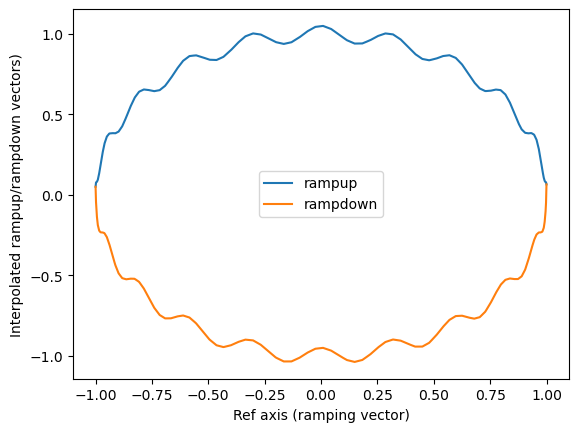

In [20]:
fig, ax = plt.subplots()
ax.plot(ramping_vector,interpolated_rampup,label='rampup')
ax.plot(ramping_vector,interpolated_rampdown,label='rampdown')
ax.legend()
ax.set_xlabel('Ref axis (ramping vector)')
ax.set_ylabel('Interpolated rampup/rampdown vectors)')
print(f'Hysteresis Area: {hysteresis_area}')
print(f'Signed hysteresis Area (Mean of rampdown minus mean of rampup): {signed_hysteresis_area}')
print(f'Normalized hysteresis Area (normalized with {normalizer}): {normalized_hysteresis_area}')
print(f'Normalizer value ({normalizer}): {normalizer_value}')
